Linear Regression:<br>
**Y = wX + b**<br>
Y -> Dependent Variable<br>
X -> Independent Variable<br>
w -> Weight<br>
b -> Bias

**Gradient Descent:**<br>
Gradiant Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.<br>
w = w - α * dw<br>
b = b - α * db

**Learning Rate:**<br>
Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimum loss function.<br>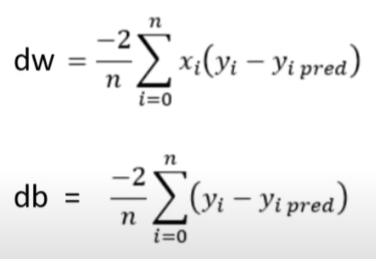

In [1]:
import numpy as np

In [31]:
class Linear_Regression():
  '''
  Implements a Linear Regression model using Gradient Descent.
  '''

  def __init__(self, learning_rate: float, iterations_count: int):
    '''
    Initializes the Linear Regression model.

    Args:
      learning_rate (float): The step size for updating model parameters.
      iterations_count (int): The number of iterations for gradient descent.
    '''

    self.learning_rate = learning_rate
    self.iterations_count = iterations_count


  def fit(self, x: np.ndarray, y: np.ndarray):
    '''
    Trains the Linear Regression model using Gradient Descent.

    Args:
      x (np.ndarray): Feature matrix (input data).
      y (np.ndarray): Target vector (output labels).
    '''

    # Number of training examples & number of features
    # (Rows & columns)
    self.m, self.n = x.shape

    # Initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    # Implementing Gradient Descent

    for i in range(self.iterations_count):
      self.update_weights()


  def update_weights(self):
    '''
    Computes and updates model weights using Gradient Descent.
    '''

    y_prediction = self.predict(self.x)

    # Calculate gradients

    dw = - (2 * (self.x.T).dot(self.y - y_prediction)) / self.m

    db = - 2 * np.sum(self.y - y_prediction) / self.m

    # Updating the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, x: np.ndarray) -> np.ndarray:
    '''
    Makes predictions using the trained model.

    Args:
      x (np.ndarray): Input feature matrix.

    Returns:
      np.ndarray: Predicted values.
    '''

    return x.dot(self.w) + self.b



# Testing the Model

Let's do a fast check on the algorithm.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asinow/car-price-dataset")

print("Path to dataset files:", path)

100%|██████████| 135k/135k [00:00<00:00, 49.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1


In [8]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1/car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [22]:
df = df.dropna()

In [23]:
X = df.drop(['Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission', 'Price'], axis=1)
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [166]:
our_model = Linear_Regression(learning_rate=0.003, iterations_count=10000)

our_model.fit(X_train_scaled, y_train)

In [167]:
print('weight = ', our_model.w[0])
print('bias = ', our_model.b)

weight =  1133.103254984503
bias =  8826.46037499985


In [168]:
y_pred1 = our_model.predict(X_test_scaled)

In [170]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred1)
print("R² Score:", r2)

R² Score: 0.4240209242137758


In [121]:
from sklearn.linear_model import LinearRegression

other_model = LinearRegression()
other_model.fit(X_train_scaled, y_train)

LinearRegression()

In [124]:
y_pred2 = other_model.predict(X_test_scaled)

In [171]:
r2 = r2_score(y_test, y_pred2)
print("R² Score:", r2)

R² Score: 0.424020924213777


# - Mert Özek